In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
df = pd.read_csv("Hostel_City_Ratings.csv", index_col=[0])
df.head()
df_copy = df.copy()

df_copy

,HI Calgary City Centre,Wicked Hostels - Calgary
0,9.3,9.7
1,9.1,9.1
2,9.4,9.4
3,8.4,9.1
4,9.3,8.3
5,8.7,8.5
6,8.7,8.6


In [78]:
df_test = df_copy.set_axis(['Security', 'Location', 'Staff', 'Atmosphere', 'Cleanliness', 'Value', 'Facilities'], axis=0, copy=True)

In [79]:
df_test.loc['Average']= df.mean()
df_test

,HI Calgary City Centre,Wicked Hostels - Calgary
Security,9.300000,9.700000
Location,9.100000,9.100000
Staff,9.400000,9.400000
Atmosphere,8.400000,9.100000
Cleanliness,9.300000,8.300000
Value,8.700000,8.500000
Facilities,8.700000,8.600000
Average,8.985714,8.957143


In [80]:
df_test = df_test.T.reset_index()
df_test = df_test.set_axis(['Name', 'Security', 'Location', 'Staff', 'Atmosphere', 'Cleanliness', 'Value', 'Facilities', 'Average'], axis=1, copy=True)
df_test

,Name,Security,Location,Staff,Atmosphere,Cleanliness,Value,Facilities,Average
0,HI Calgary City Centre,9.3,9.1,9.4,8.4,9.3,8.7,8.7,8.985714
1,Wicked Hostels - Calgary,9.7,9.1,9.4,9.1,8.3,8.5,8.6,8.957143


In [81]:
avg_graph = df_test.iloc[:, [0,8]].head(46)
avg_graph = avg_graph.sort_values('Average', ascending=False)
avg_graph

,Name,Average
0,HI Calgary City Centre,8.985714
1,Wicked Hostels - Calgary,8.957143


/var/folders/gf/cr37zbpx4y538lybk11nb5nr0000gn/T/ipykernel_3092/3092758972.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)


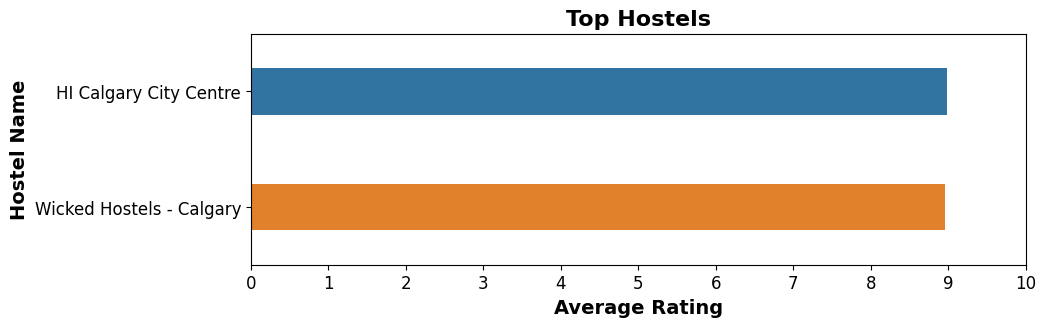

In [106]:
top_ten = avg_graph.sort_values(by= 'Average', ascending=False)[:10]

fig_height = 2 + 0.5 * len(avg_graph)
fig, ax = plt.subplots(figsize=(10,fig_height))

ax.set_xlim(0,10)
ax.set_xticks(range(0,11))

ax.set_xticklabels(ax.get_xticks(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

sns.barplot(y=top_ten.Name, x=top_ten.Average, width=0.4)

plt.title('Top Hostels', fontsize=16, fontweight='bold')

plt.xlabel('Average Rating', fontsize=14, fontweight='bold')
plt.ylabel('Hostel Name', fontsize=14, fontweight='bold')

plt.savefig('static/images/graph1.png', bbox_inches='tight')

plt.show()

plt.close()


In [83]:
highest_security = df_test.iloc[:, [0,1]].head(10)
highest_security = highest_security.sort_values('Security', ascending=False)
print(highest_security)

                       Name  Security
1  Wicked Hostels - Calgary       9.7
0    HI Calgary City Centre       9.3


/var/folders/gf/cr37zbpx4y538lybk11nb5nr0000gn/T/ipykernel_3092/1207023461.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)


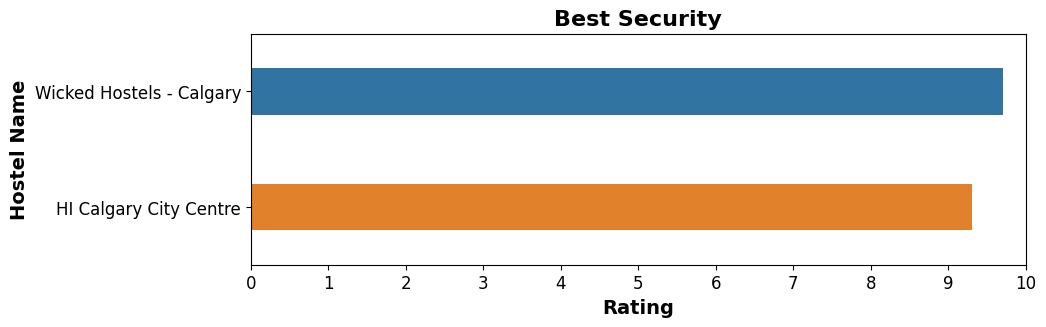

In [105]:
top_security = highest_security.sort_values(by= 'Security', ascending=False)[:20]

fig_height = 2 + 0.5 * len(top_security)
fig, ax = plt.subplots(figsize=(10,fig_height))

ax.set_xlim(0,10)
ax.set_xticks(range(0,11))

ax.set_xticklabels(ax.get_xticks(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)


sns.barplot(y=top_security.Name, x=top_security.Security, width=0.4)

plt.title('Best Security', fontsize=16, fontweight='bold')

plt.xlabel('Rating', fontsize=14,fontweight='bold' )
plt.ylabel('Hostel Name', fontsize=14, fontweight='bold')

plt.savefig('static/images/graph2.png', bbox_inches='tight')

plt.show()

plt.close()

In [85]:
highest_location = df_test.iloc[:, [0,2]].head(10)
highest_location = highest_location.sort_values('Location', ascending=False)
print(highest_location)

                       Name  Location
0    HI Calgary City Centre       9.1
1  Wicked Hostels - Calgary       9.1


/var/folders/gf/cr37zbpx4y538lybk11nb5nr0000gn/T/ipykernel_3092/3929558460.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)


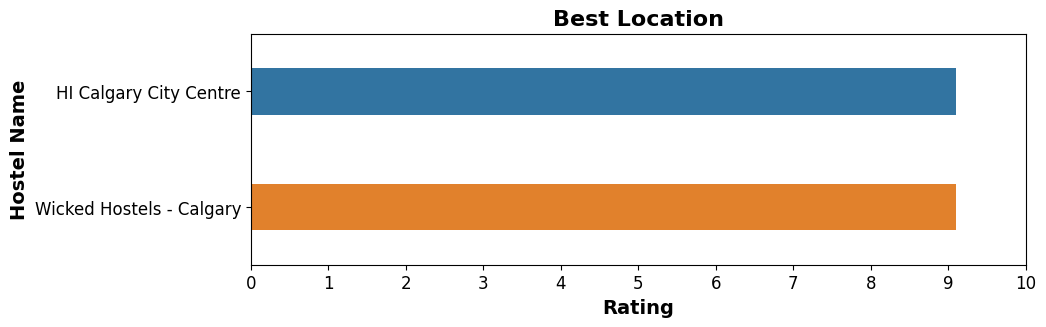

In [107]:
top_location = highest_location.sort_values(by= 'Location', ascending=False)[:20]

fig_height = 2 + 0.5 * len(top_location)
fig, ax = plt.subplots(figsize=(10,fig_height))

ax.set_xlim(0,10)
ax.set_xticks(range(0,11))

ax.set_xticklabels(ax.get_xticks(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

sns.barplot(y=top_location.Name, x=top_location.Location, width=0.4)

plt.title('Best Location', fontsize=16, fontweight='bold')

plt.xlabel('Rating', fontsize=14, fontweight='bold')
plt.ylabel('Hostel Name', fontsize=14, fontweight='bold')

plt.savefig('static/images/graph3.png', bbox_inches='tight')

plt.show()

plt.close()

In [87]:
highest_staff = df_test.iloc[:, [0,3]].head(10)
highest_staff = highest_staff.sort_values('Staff', ascending=False)
print(highest_staff)

                       Name  Staff
0    HI Calgary City Centre    9.4
1  Wicked Hostels - Calgary    9.4


/var/folders/gf/cr37zbpx4y538lybk11nb5nr0000gn/T/ipykernel_3092/1150115446.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)


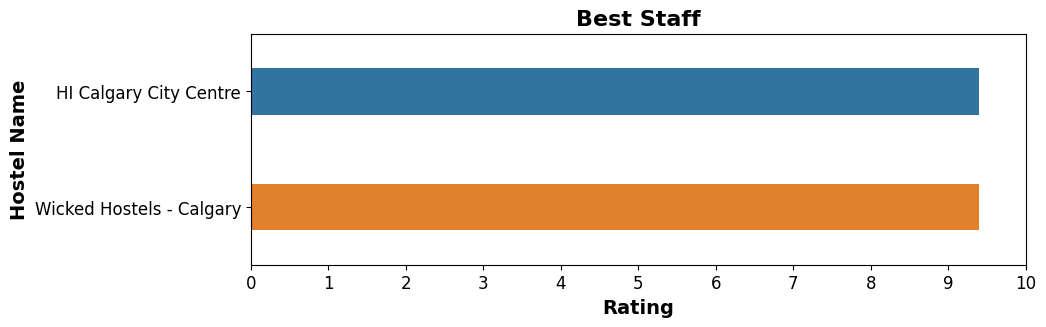

In [108]:
top_staff = highest_staff.sort_values(by= 'Staff', ascending=False)[:20]

fig_height = 2 + 0.5 * len(top_staff)
fig, ax = plt.subplots(figsize=(10,fig_height))

ax.set_xlim(0,10)
ax.set_xticks(range(0,11))

ax.set_xticklabels(ax.get_xticks(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

sns.barplot(y=top_staff.Name, x=top_staff.Staff, width=0.4)

plt.title('Best Staff', fontsize=16, fontweight='bold')

plt.xlabel('Rating', fontsize=14, fontweight='bold')
plt.ylabel('Hostel Name', fontsize=14, fontweight='bold')

plt.savefig('static/images/graph4.png', bbox_inches='tight')

plt.show()

plt.close()

In [89]:
highest_atmosphere = df_test.iloc[:, [0,4]].head(10)
highest_atmosphere = highest_atmosphere.sort_values('Atmosphere', ascending=False)
print(highest_atmosphere)

                       Name  Atmosphere
1  Wicked Hostels - Calgary         9.1
0    HI Calgary City Centre         8.4


/var/folders/gf/cr37zbpx4y538lybk11nb5nr0000gn/T/ipykernel_3092/348226395.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)


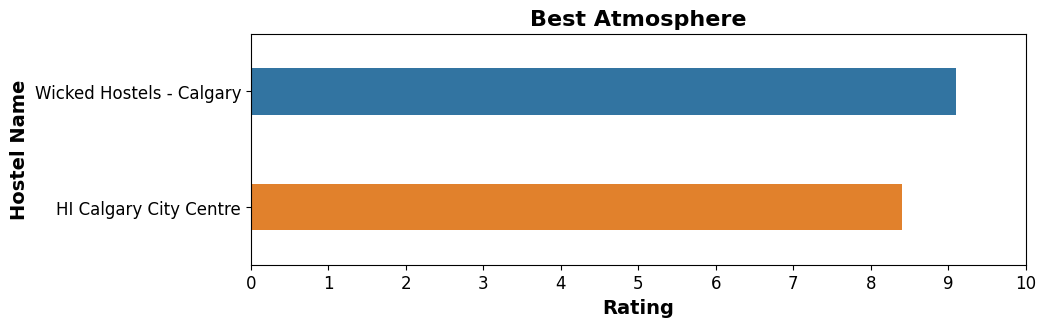

In [110]:
top_atmosphere = highest_atmosphere.sort_values(by= 'Atmosphere', ascending=False)[:20]

fig_height = 2 + 0.5 * len(top_atmosphere)
fig, ax = plt.subplots(figsize=(10,fig_height))

ax.set_xlim(0,10)
ax.set_xticks(range(0,11))

ax.set_xticklabels(ax.get_xticks(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

sns.barplot(y=top_atmosphere.Name, x=top_atmosphere.Atmosphere, width=0.4)

plt.title('Best Atmosphere', fontsize=16, fontweight='bold')

plt.xlabel('Rating', fontsize=14, fontweight='bold')
plt.ylabel('Hostel Name', fontsize=14, fontweight='bold')

plt.savefig('static/images/graph5.png', bbox_inches='tight')

plt.show()

plt.close()

In [91]:
highest_clean = df_test.iloc[:, [0,5]].head(10)
highest_clean = highest_clean.sort_values('Cleanliness', ascending=False)
print(highest_clean)

                       Name  Cleanliness
0    HI Calgary City Centre          9.3
1  Wicked Hostels - Calgary          8.3


/var/folders/gf/cr37zbpx4y538lybk11nb5nr0000gn/T/ipykernel_3092/3239465856.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)


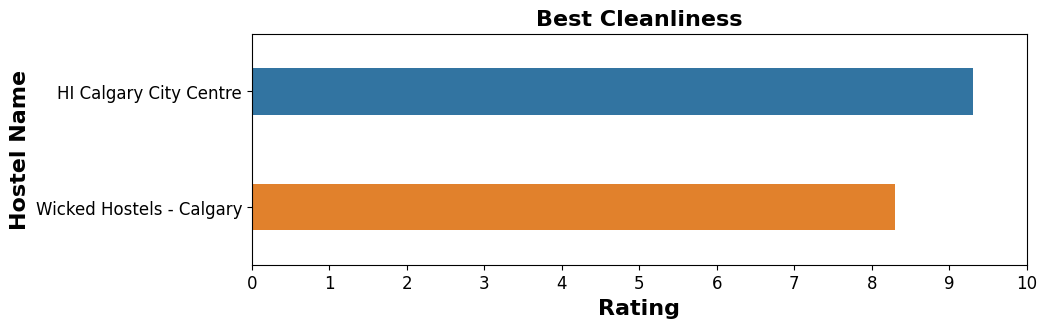

In [111]:
top_clean = highest_clean.sort_values(by= 'Cleanliness', ascending=False)[:20]

fig_height = 2 + 0.5 * len(top_clean)
fig, ax = plt.subplots(figsize=(10,fig_height))

ax.set_xlim(0,10)
ax.set_xticks(range(0,11))

ax.set_xticklabels(ax.get_xticks(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

sns.barplot(y=top_clean.Name, x=top_clean.Cleanliness, width=0.4)

plt.title('Best Cleanliness', fontsize=16, fontweight='bold')

plt.xlabel('Rating', fontsize=16, fontweight='bold')
plt.ylabel('Hostel Name', fontsize=16, fontweight='bold')

plt.savefig('static/images/graph6.png', bbox_inches='tight')

plt.show()

plt.close()

In [93]:
highest_value = df_test.iloc[:, [0,6]].head(10)
highest_value = highest_value.sort_values('Value', ascending=False)
print(highest_value)

                       Name  Value
0    HI Calgary City Centre    8.7
1  Wicked Hostels - Calgary    8.5


/var/folders/gf/cr37zbpx4y538lybk11nb5nr0000gn/T/ipykernel_3092/1847250791.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)


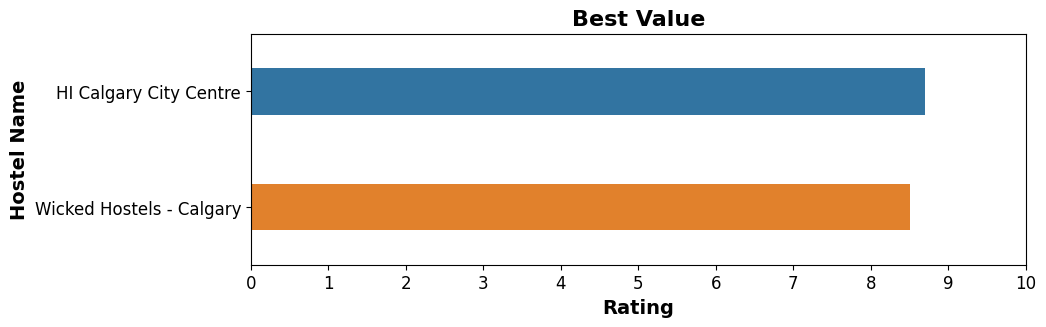

In [112]:
top_value = highest_value.sort_values(by= 'Value', ascending=False)[:20]

fig_height = 2 + 0.5 * len(top_value)
fig, ax = plt.subplots(figsize=(10,fig_height))

ax.set_xlim(0,10)
ax.set_xticks(range(0,11))

ax.set_xticklabels(ax.get_xticks(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

sns.barplot(y=top_value.Name, x=top_value.Value, width=0.4)

plt.title('Best Value', fontsize=16, fontweight='bold')

plt.xlabel('Rating', fontsize=14, fontweight='bold')
plt.ylabel('Hostel Name', fontsize=14, fontweight='bold')

plt.savefig('static/images/graph7.png', bbox_inches='tight')

plt.show()

plt.close()

In [95]:
highest_facility = df_test.iloc[:, [0,7]].head(10)
highest_facility = highest_facility.sort_values('Facilities', ascending=False)
print(highest_facility)

                       Name  Facilities
0    HI Calgary City Centre         8.7
1  Wicked Hostels - Calgary         8.6


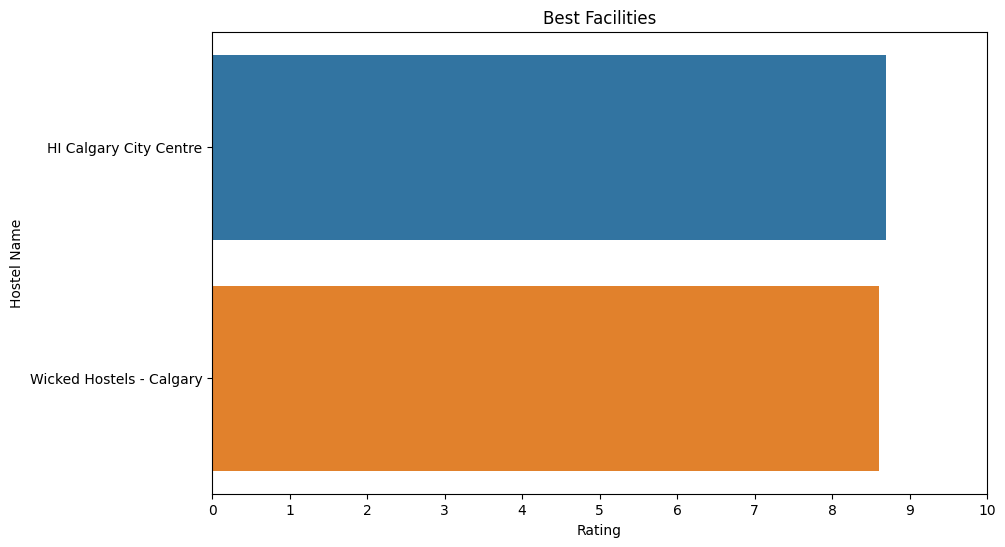

In [96]:
top_facility = highest_facility.sort_values(by= 'Facilities', ascending=False)[:20]

fig_height = 2 + 0.5 * len(top_facility)
fig, ax = plt.subplots(figsize=(10,fig_height))

ax.set_xlim(0,10)
ax.set_xticks(range(0,11))

ax.set_xticklabels(ax.get_xticks(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

sns.barplot(y=top_facility.Name, x=top_facility.Facilities, width=0.4)

plt.title('Best Facilities', fontsize=16, fontweight='bold')

plt.xlabel('Rating', fontsize=14, fontweight='bold')
plt.ylabel('Hostel Name', fontsize=14, fontweight='bold')

plt.savefig('static/images/graph8.png', bbox_inches='tight')

plt.show()

plt.close()